<a href="https://colab.research.google.com/github/skolix15/Machine_Learning_2025/blob/main/Exercise_seven_(7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB

# Question 1

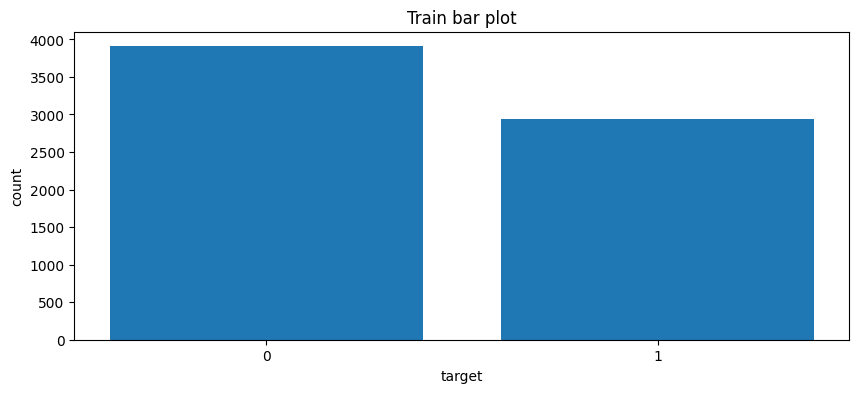

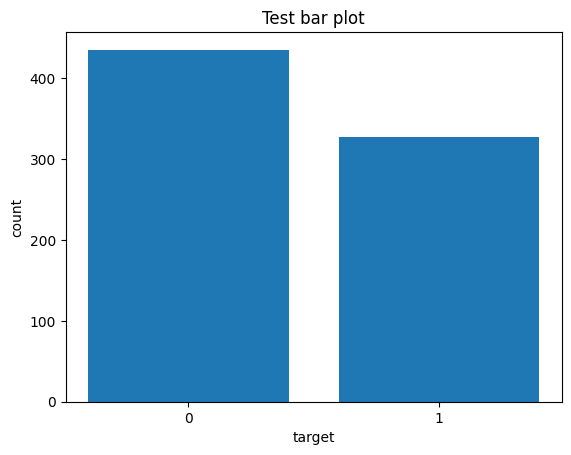

In [2]:
df = pd.read_csv('train.csv')
# df.describe()
# print(df)

# Set x data
x = df.drop(columns=["target"])

# Set target
y = df["target"]

# Separate train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0, stratify=y)

# Calculate train and test counts
train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()


# Create bar plot
plt.figure(figsize=(10,4))

# Create bar plot for train
plt.bar([0, 1], y_train.value_counts().sort_index())
plt.xticks([0, 1])
plt.xlabel("target")
plt.ylabel("count")
plt.title("Train bar plot")
plt.show()
print("\n\n")

# Create bar plot for train
plt.bar([0, 1], y_test.value_counts().sort_index())
plt.xticks([0, 1])
plt.xlabel("target")
plt.ylabel("count")
plt.title("Test bar plot")
plt.show()



Το dataset δεν είναι ισορροπημένο καθώς υπάρχουν αρκετά περισσότερα δείγματα με target = 0 από αυτά με target = 1. Αξίζει όμως να σημειωθεί ότι η κατανομή των κλάσεων διατηρείται τόσο στο train όσο και στο test set (λόγω split με stratify)

# Question 2

In [3]:
# Drop columns
updated_df = df.drop(columns=["id", "location"])

# Fill na values
updated_df = updated_df.fillna("null")

# Combine columns keyword and text
updated_df["inputs"] = updated_df["keyword"] + " " + updated_df["text"]

print(updated_df)

     keyword                                               text  target  \
0       null  Our Deeds are the Reason of this #earthquake M...       1   
1       null             Forest fire near La Ronge Sask. Canada       1   
2       null  All residents asked to 'shelter in place' are ...       1   
3       null  13,000 people receive #wildfires evacuation or...       1   
4       null  Just got sent this photo from Ruby #Alaska as ...       1   
...      ...                                                ...     ...   
7608    null  Two giant cranes holding a bridge collapse int...       1   
7609    null  @aria_ahrary @TheTawniest The out of control w...       1   
7610    null  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1   
7611    null  Police investigating after an e-bike collided ...       1   
7612    null  The Latest: More Homes Razed by Northern Calif...       1   

                                                 inputs  
0     null Our Deeds are the Reason of th

# Question 3

## Import desired methods

In [4]:
!git clone https://github.com/Deffro/text-preprocessing-techniques.git


fatal: destination path 'text-preprocessing-techniques' already exists and is not an empty directory.


In [5]:
import os
os.chdir("/content/text-preprocessing-techniques")

from techniques import (
    removeUnicode,
    replaceURL,
    replaceAtUser,
    removeHashtagInFrontOfWord,
    replaceContraction,
)

In [6]:
def preprocess_text(text):
    text = removeUnicode(text)
    text = replaceURL(text)
    text = replaceAtUser(text)
    text = removeHashtagInFrontOfWord(text)
    text = replaceContraction(text)
    return text

updated_df["inputs"] = updated_df["inputs"].apply(preprocess_text)

print(updated_df)

     keyword                                               text  target  \
0       null  Our Deeds are the Reason of this #earthquake M...       1   
1       null             Forest fire near La Ronge Sask. Canada       1   
2       null  All residents asked to 'shelter in place' are ...       1   
3       null  13,000 people receive #wildfires evacuation or...       1   
4       null  Just got sent this photo from Ruby #Alaska as ...       1   
...      ...                                                ...     ...   
7608    null  Two giant cranes holding a bridge collapse int...       1   
7609    null  @aria_ahrary @TheTawniest The out of control w...       1   
7610    null  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1   
7611    null  Police investigating after an e-bike collided ...       1   
7612    null  The Latest: More Homes Razed by Northern Calif...       1   

                                                 inputs  
0     null Our Deeds are the Reason of th

**Περιγραφή**


1. removeUnicode -> Αφαιρεί unicode strings

2. replaceURL -> Αφαιρεί urls

3. replaceAtUser -> Διαγράφει τον χαρακτήρα @ από τα user tags

4. removeHashtagInFrontOfWord -> Αφαιρεί τον χαρακτήρα # από τα hashtags

5. replaceContraction -> Μετατροπή συντομεύσεων σε ολόκληρη έκφραση


**Λόγος επιλογής**

1. removeUnicode -> Τα unicode string δεν προσφέρουν κάποια πληροφορία, παραμόνο θόρυβο. Σβήνονται για να παραμείνει μόνο το αναλυτικό κείμενο

2. replaceURL ->  Τα unicode string δεν προσφέρουν κάποια πληροφορία για ανάλυση κειμένου

3. replaceAtUser -> Η αναφορά σε χρήστες δεν είναι χρήσιμη για την κατανόηση του περιεχομένου ενός tweet

4. removeHashtagInFrontOfWord -> το # δεν προσφέρει κάποια πληροφορία. Διαγράφονται οι συγκεκριμένοι χαρακτήρες ενώ ταύτοχρονα διατηρείται η πληροφορία των hashtags

5. replaceContraction -> Ομογενοποιείται το κείμενο με στόχο να διευκολυνθεί η επεξεργασία/ανάλυση του




# Question 4

In [7]:
# Numpy arrays from columns inputs and target
x = updated_df["inputs"].to_numpy()
y = updated_df["target"].to_numpy()

# Print results
print("Inputs shape:", x.shape, "\n")
print("Targets shape:", y.shape, "\n")

# For check
print("Some results of x set:\n\n", x[:3], "\n")
print("Some results of y set:\n\n", y[:3])

Inputs shape: (7613,) 

Targets shape: (7613,) 

Some results of x set:

 ['null Our Deeds are the Reason of this earthquake May ALLAH Forgive us all'
 'null Forest fire near La Ronge Sask. Canada'
 "null All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"] 

Some results of y set:

 [1 1 1]


# Question 5

In [8]:
# Split data again
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0, stratify=y)

# Create TF-IDF Vectorizer
tf_idf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit transofrm to train set
x_train_tf_idf = tf_idf_vectorizer.fit_transform(x_train)

# Transform to test set
x_test_tf_idf = tf_idf_vectorizer.transform(x_test)

# Print results
print("X train tf idf shape: ", x_train_tf_idf.shape)
print("X test tf idf shape: ", x_test_tf_idf.shape)

X train tf idf shape:  (6851, 5000)
X test tf idf shape:  (762, 5000)


# Question 6

In [9]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test):

  model.fit(x_train, y_train)
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  metrics_train = {
      "accuracy": accuracy_score(y_train, y_train_pred),
      "f1_score": f1_score(y_train, y_train_pred, average='weighted'),
      "precision": precision_score(y_train, y_train_pred, average='weighted'),
      "recall": recall_score(y_train, y_train_pred, average='weighted')
  }

  metrics_test = {
      "accuracy": accuracy_score(y_test, y_test_pred),
      "f1_score": f1_score(y_test, y_test_pred, average='weighted'),
      "precision": precision_score(y_test, y_test_pred, average='weighted'),
      "recall": recall_score(y_test, y_test_pred, average='weighted')
  }

  return metrics_train, metrics_test

def print_metrics(given_metrics):
  print(f"Accuracy: {given_metrics['accuracy']:.4f}")
  print(f"F1-score: {given_metrics['f1_score']:.4f}")
  print(f"Precision: {given_metrics['precision']:.4f}")
  print(f"Recall: {given_metrics['recall']:.4f}\n\n")


# Create LinearSVC
clf = LinearSVC(random_state=0)

# Train and evaluate
linear_no_pca_train_metr, linear_no_pca_test_metr = train_and_evaluate(clf, x_train_tf_idf, y_train, x_test_tf_idf, y_test)

# Print results
print("----- Train Metris / Linear Without PCA -----\n")
print_metrics(linear_no_pca_train_metr)

print("----- Test Metris / Linear Without PCA -----\n")
print_metrics(linear_no_pca_test_metr)

----- Train Metris / Linear Without PCA -----

Accuracy: 0.9302
F1-score: 0.9299
Precision: 0.9313
Recall: 0.9302


----- Test Metris / Linear Without PCA -----

Accuracy: 0.8018
F1-score: 0.8010
Precision: 0.8012
Recall: 0.8018




Η πιο σημαντική μετρική είναι η F1-score διότι συνδυάζει την ικανότητα του μοντέλου να εντοπίζει σωστά τα θετικά (recall) χωρίς να προβλέπει υπερβολικά πολλά λανθασμένα θετικά (precision).

# Question 7

In [10]:
# Convert x and y to arrays for PCA
x_train_array = x_train_tf_idf.toarray()
x_test_array = x_test_tf_idf.toarray()

# PCA
pca = PCA(n_components=0.95, random_state=0)
x_train_pca = pca.fit_transform(x_train_array)
x_test_pca = pca.transform(x_test_array)

# LinearSVC
clf_with_pca = LinearSVC(random_state=0, max_iter=5000)

# Train and evaluate
linear_pca_train_metr, linear_pca_test_metr = train_and_evaluate(clf_with_pca, x_train_pca, y_train, x_test_pca, y_test)

# Print results
print("----- Train Metris / Linear With PCA -----\n")
print_metrics(linear_pca_train_metr)

print("----- Test Metris / Linear With PCA -----\n")
print_metrics(linear_pca_test_metr)

# RBF SVC
rbf_clf = SVC(kernel='rbf', random_state=42)

# Train and evaluate
rbf_scale_pca_train_metr, rbf_scale_pca_test_metr = train_and_evaluate(rbf_clf, x_train_pca, y_train, x_test_pca, y_test)

# Print results
print("----- Train Metris / RBF Scale With PCA -----\n")
print_metrics(rbf_scale_pca_train_metr)

print("----- Test Metris / RBF Scale With PCA -----\n")
print_metrics(rbf_scale_pca_test_metr)

----- Train Metris / Linear With PCA -----

Accuracy: 0.9047
F1-score: 0.9040
Precision: 0.9061
Recall: 0.9047


----- Test Metris / Linear With PCA -----

Accuracy: 0.8097
F1-score: 0.8093
Precision: 0.8092
Recall: 0.8097


----- Train Metris / RBF Scale With PCA -----

Accuracy: 0.9321
F1-score: 0.9316
Precision: 0.9342
Recall: 0.9321


----- Test Metris / RBF Scale With PCA -----

Accuracy: 0.8241
F1-score: 0.8222
Precision: 0.8254
Recall: 0.8241




Μετά τον μετασχηματισμό PCA, τα αποτελέσματα δείχνουν ότι το SVC με RBF kernel αποδίδει ελαφρώς καλύτερα από το LinearSVC. Ωστόσο, η διαφορά στις μετρικές δεν είναι ιδιαίτερα μεγάλη, κάτι που υποδηλώνει ότι το πρόβλημα μπορεί να προσεγγιστεί ικανοποιητικά και με ένα γραμμικό μοντέλο, όπως το LinearSVC.

# Question 8

In [11]:
# gamma explanation:
# - 'scale' = 1 / (n_features * x.var())
# - 'auto'  = 1 / n_features

# RBF SVC
rbf_auto_clf = SVC(kernel='rbf', gamma="auto", random_state=0)

# Train and evaluate
rbf_auto_pca_train_metr, rbf_auto_pca_test_metr = train_and_evaluate(rbf_auto_clf, x_train_pca, y_train, x_test_pca, y_test)

# Print results
print("----- Train Metris / RBF Auto With PCA -----\n")
print_metrics(rbf_auto_pca_train_metr)

print("----- Test Metris / RBF Auto With PCA -----\n")
print_metrics(rbf_auto_pca_test_metr)


----- Train Metris / RBF Auto With PCA -----

Accuracy: 0.5703
F1-score: 0.4142
Precision: 0.3252
Recall: 0.5703


----- Test Metris / RBF Auto With PCA -----

Accuracy: 0.5709
F1-score: 0.4149
Precision: 0.3259
Recall: 0.5709




/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
# All models together (test metrics)
results = [
    {"model": "LinearSVC", **linear_no_pca_test_metr},
    {"model": "LinearSVC (PCA)", **linear_pca_test_metr},
    {"model": "RBF Scale (PCA)", **rbf_scale_pca_test_metr},
    {"model": "RBF Auto (PCA)", **rbf_auto_pca_test_metr},
]

res_df = pd.DataFrame(results).set_index("model")
print(res_df)


                 accuracy  f1_score  precision    recall
model                                                   
LinearSVC        0.801837  0.800990   0.801163  0.801837
LinearSVC (PCA)  0.809711  0.809272   0.809175  0.809711
RBF Scale (PCA)  0.824147  0.822162   0.825419  0.824147
RBF Auto (PCA)   0.570866  0.414915   0.325888  0.570866


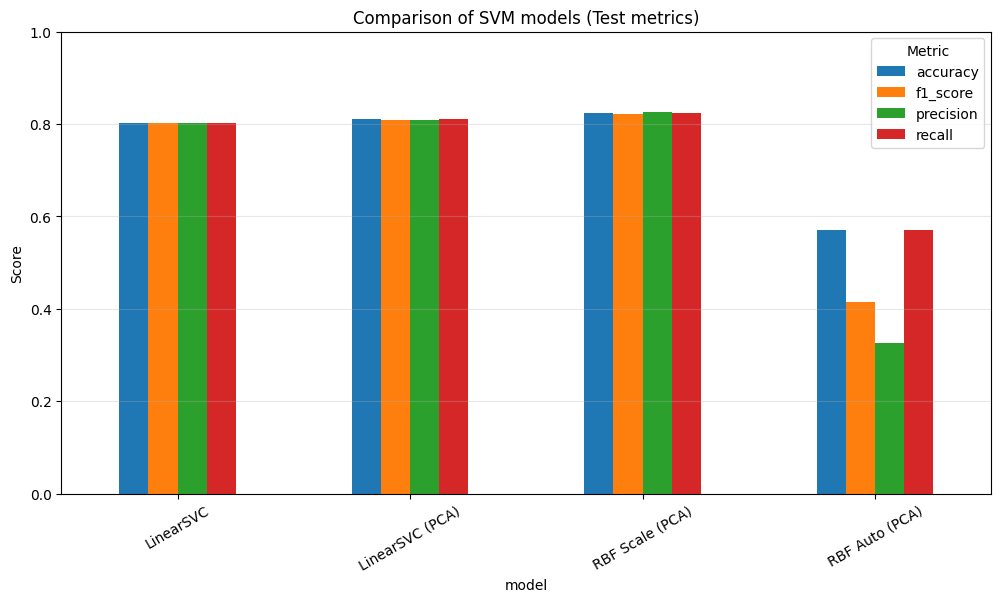

In [13]:
metrics = ["accuracy", "f1_score", "precision", "recall"]

plt.figure(figsize=(12,6))

res_df.plot(
    kind="bar",
    ylim=(0,1),
    ax=plt.gca()
)

plt.ylabel("Score")
plt.title("Comparison of SVM models (Test metrics)")
plt.xticks(rotation=30)
plt.legend(title="Metric")
plt.grid(axis="y", alpha=0.3)

plt.show()

Από το διάγραμμα παρατηρείται ότι τα μοντέλα LinearSVC, τόσο με, όσο και χωρίς PCA, παρουσιάζουν παρόμοια και σχετικά σταθερή απόδοση σε όλες τις μετρικές. Η εφαρμογή του PCA φαίνεται να βελτιώνει ελαφρώς τα αποτελέσματα, ιδιαίτερα στο RBF SVC με gamma=scale, το οποίο επιτυγχάνει τις υψηλότερες τιμές συνολικά, δείχνοντας ότι ο μη γραμμικός πυρήνας επωφελείται από τη μείωση διαστάσεων. Αντίθετα, το RBF SVC με gamma=auto εμφανίζει σημαντικά χαμηλότερες επιδόσεις, κυρίως στο F1 και στο precision, γεγονός που υποδηλώνει ότι η συγκεκριμένη ρύθμιση της παραμέτρου gamma δεν είναι κατάλληλη για τα δεδομένα. Συνολικά, το RBF SVC με default gamma (scale) και PCA φαίνεται να προσφέρει την καλύτερη απόδοση.

# Question 9

In [14]:
# Convert x and y to dense arrays
x_train_array = x_train_tf_idf.toarray()
x_test_array = x_test_tf_idf.toarray()

# Create GaussianNB
gnb = GaussianNB()

# Train and evaluate
gnb_train_metr, gnb_test_metr = train_and_evaluate(clf, x_train_array, y_train, x_test_array, y_test)

# Print results
print("----- Train Metris / GaussianNB -----\n")
print_metrics(gnb_train_metr)

print("----- Test Metris / GaussianNB -----\n")
print_metrics(gnb_test_metr)

----- Train Metris / GaussianNB -----

Accuracy: 0.9302
F1-score: 0.9299
Precision: 0.9313
Recall: 0.9302


----- Test Metris / GaussianNB -----

Accuracy: 0.8018
F1-score: 0.8010
Precision: 0.8012
Recall: 0.8018




Από τα αποτελέσματα φαίνεται ότι ο Gaussian Naive Bayes αποδίδει πάρα πολύ καλά στο σύνολο εκπαίδευσης, όμως η επίδοση στο σύνολο ελέγχου είναι χαμηλότερη. Αυτό δείχνει ότι το μοντέλο μαθαίνει αρκετά καλά τα δεδομένα του train, αλλά δεν γενικεύει το ίδιο καλά σε νέα δεδομένα. Παρόλα αυτά, τα αποτελέσματα στο test set είναι πολύ ικανοποιητικά.